In [1]:
from api import API

Using TensorFlow backend.
/data/anaconda/envs/nilmtk_env/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:5201: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/deepak/.keras/keras.json' mode='r' encoding='UTF-8'>
  _config = json.load(open(_config_path))


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [18]:
# REDD actual

redd={
    'params': {
            'power': {'mains':['apparent','active'],
                      'appliance':['active','apparent']
                     }
        },
    'sample_rate': 60,
    'appliances': ['light'],
    'methods': {
        
                'WindowGRU': {'n_epochs':100, 'batch_size':1024, 'sequence-length':39},
                'Zero': {},
                'Mean': {},
                'CO':{},
                'FHMM':{}
               },
    'pre_trained': False,
    'preprocessing': False,
    'chunk_size': 100000,
    
    'train': {    
    'datasets': {
            'REDD': {
                'path': '/home/deepak/Raktim/datasets/lowfreq.h5',
				'buildings': {
					2: {
						'start_time': '2011-04-17',
						'end_time': '2011-04-30'
					}
                }
                
			}
		}
	},
	'test': {
		'datasets': {
			'REDD': {
                'path': '/home/deepak/Raktim/datasets/lowfreq.h5',
				'buildings': {
					2: {
						'start_time': '2011-05-01',
						'end_time': '2011-05-05'
					}
                }
			}
		},
        'metrics':['mae','rmse','f1-score','rel_error']
	}
}


oo Chunk Training
............... Loading Data for preprocessing ...................
............... Loading Train_Mains for preprocessing ...................
Loading data for  REDD  dataset
Loading building ...  2
['light', 'dish washer']
MeterGroup(meters=
  ElecMeter(instance=1, building=2, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=2, dataset='REDD', site_meter, appliances=[])
)
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
starting enumeration..........
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=4, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=10, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Droppping NANS
Called Partial fit
WindowGRU <disa

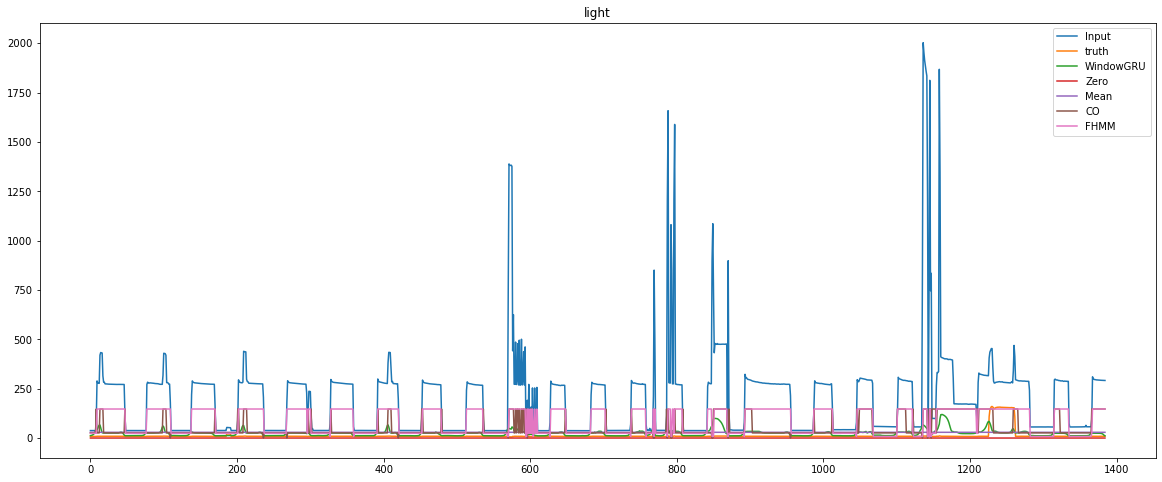

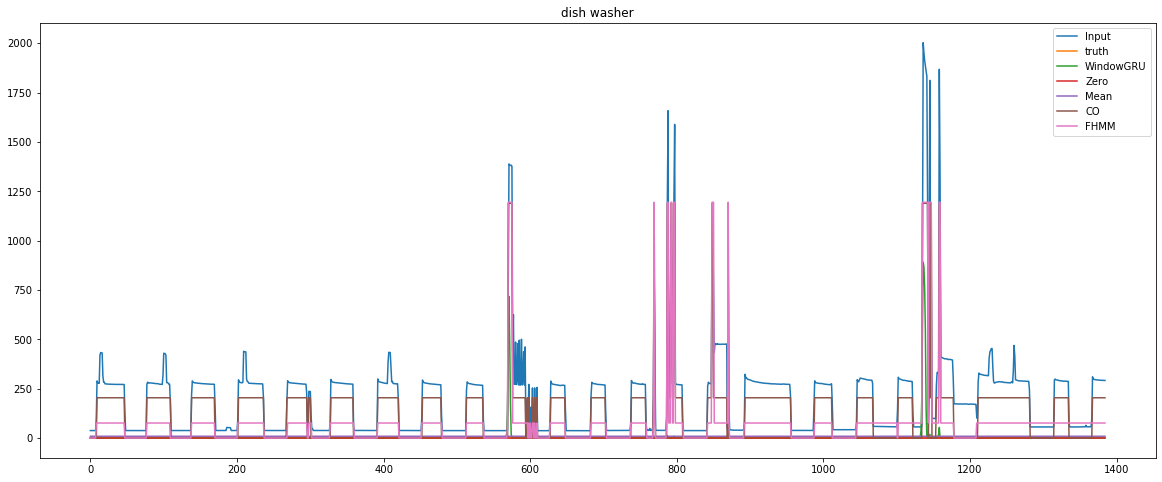

............  mae  ..............
             WindowGRU       Zero       Mean         CO       FHMM
light        17.515429  12.211423  23.163198   40.36800  74.262764
dish washer   4.555946   0.089024   8.910976  121.99614  70.784897
............  rmse  ..............
             WindowGRU       Zero       Mean          CO        FHMM
light        28.295164  25.920622  28.365757   62.170856   97.361969
dish washer  52.506123   0.128251   8.911454  220.325455  187.743546
............  f1-score  ..............
             WindowGRU  Zero     Mean        CO      FHMM
light          0.09622   0.0  0.09622  0.097425  0.106141
dish washer    0.00000   0.0  0.00000  0.000000  0.000000
............  rel_error  ..............
             WindowGRU       Zero       Mean          CO       FHMM
light        17.515429  12.211423  23.163198   40.368000  74.262765
dish washer   4.555946   0.089024   8.910976  121.996142  70.784894


/data/anaconda/envs/nilmtk_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/data/anaconda/envs/nilmtk_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
lightanddishwasher = API(redd)

In [41]:
# REDD actual

redd={
    'params': {
            'power': {'mains':['apparent','active'],
                      'appliance':['active','apparent']
                     }
        },
    'sample_rate': 60,
    'appliances': ['light','fridge','dish washer','microwave'],
    'methods': {
        
                'DAE':{'n_epochs':300,'sequence-length':39,
                      'appliance_params':{
                              'light':
                              {
                                'mean':1000,
                                  'std':6000
                              },
                          'fridge':
                              {
                                'mean':1000,
                                  'std':6000
                              },
                          'dish washer':
                              {
                                'mean':1000,
                                  'std':6000
                              },
                          'microwave':
                              {
                                'mean':1000,
                                  'std':6000
                              }
                      }
                      
                      
                      }
               },
    'pre_trained': False,
    'preprocessing': False,
    'chunk_size': 100000,
    
    'train': {    
    'datasets': {
            'REDD': {
                'path': '/home/deepak/Raktim/datasets/lowfreq.h5',
				'buildings': {
					2: {
						'start_time': '2011-04-17',
						'end_time': '2011-04-30'
					}
                }
                
			}
		}
	},
	'test': {
		'datasets': {
			'REDD': {
                'path': '/home/deepak/Raktim/datasets/lowfreq.h5',
				'buildings': {
					2: {
						'start_time': '2011-05-01',
						'end_time': '2011-05-05'
					}
                }
			}
		},
        'metrics':['mae','rmse']
	}
}


oo Chunk Training
............... Loading Data for preprocessing ...................
............... Loading Train_Mains for preprocessing ...................
Loading data for  REDD  dataset
Loading building ...  2
['light', 'fridge', 'dish washer', 'microwave']
MeterGroup(meters=
  ElecMeter(instance=1, building=2, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=2, dataset='REDD', site_meter, appliances=[])
)
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
starting enumeration..........
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=4, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=9, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter Elec

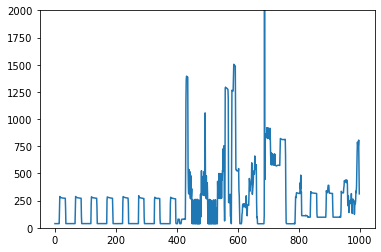

Means is 
0.0380320742990048
(58, 300) 0.45359944661458335


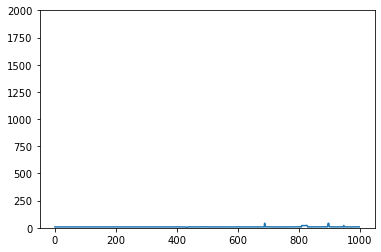

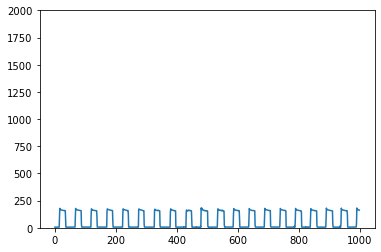

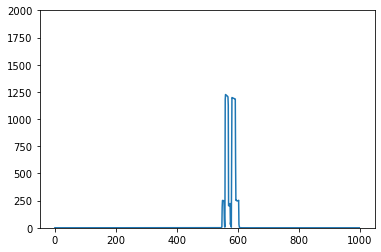

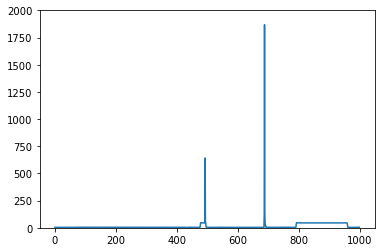

First model training for  light
Train on 49 samples, validate on 9 samples
Epoch 1/300
49/49 [==============================] - 9s 183ms/step - loss: 7.8091e-05 - val_loss: 6.6489e-05

Epoch 00001: val_loss improved from inf to 0.00007, saving model to temp-weights.h5
Epoch 2/300
49/49 [==============================] - 0s 640us/step - loss: 6.4360e-05 - val_loss: 6.4946e-05

Epoch 00002: val_loss improved from 0.00007 to 0.00006, saving model to temp-weights.h5
Epoch 3/300
49/49 [==============================] - 0s 665us/step - loss: 6.0384e-05 - val_loss: 6.4247e-05

Epoch 00003: val_loss improved from 0.00006 to 0.00006, saving model to temp-weights.h5
Epoch 4/300
49/49 [==============================] - 0s 647us/step - loss: 5.7923e-05 - val_loss: 6.0948e-05

Epoch 00004: val_loss improved from 0.00006 to 0.00006, saving model to temp-weights.h5
Epoch 5/300
49/49 [==============================] - 0s 796us/step - loss: 5.4324e-05 - val_loss: 5.7888e-05

Epoch 00005: val_loss impro

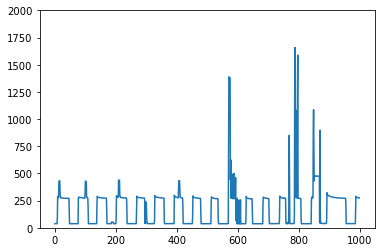

Means is 
0.030229662233564585
(5, 300) 0.3337455851236979


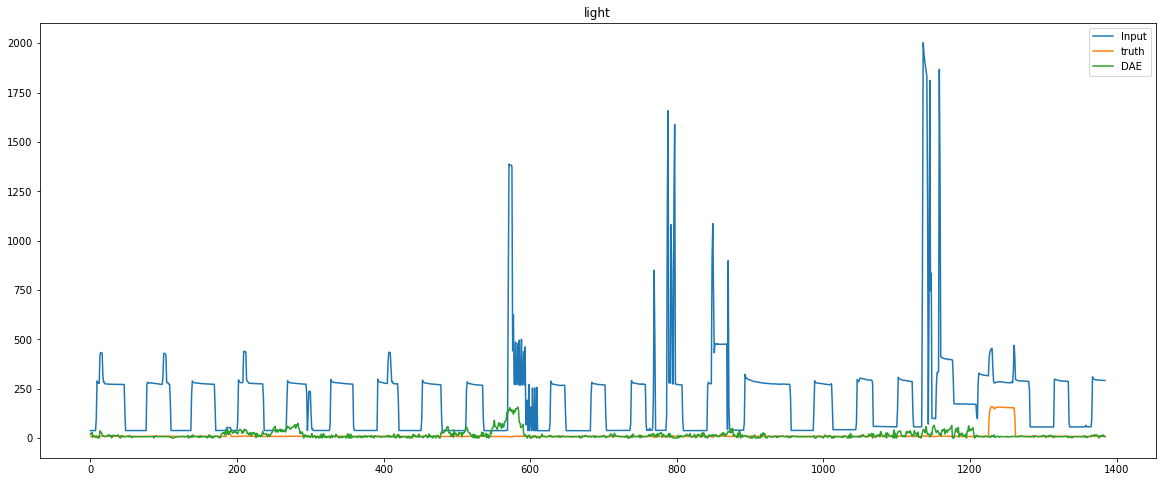

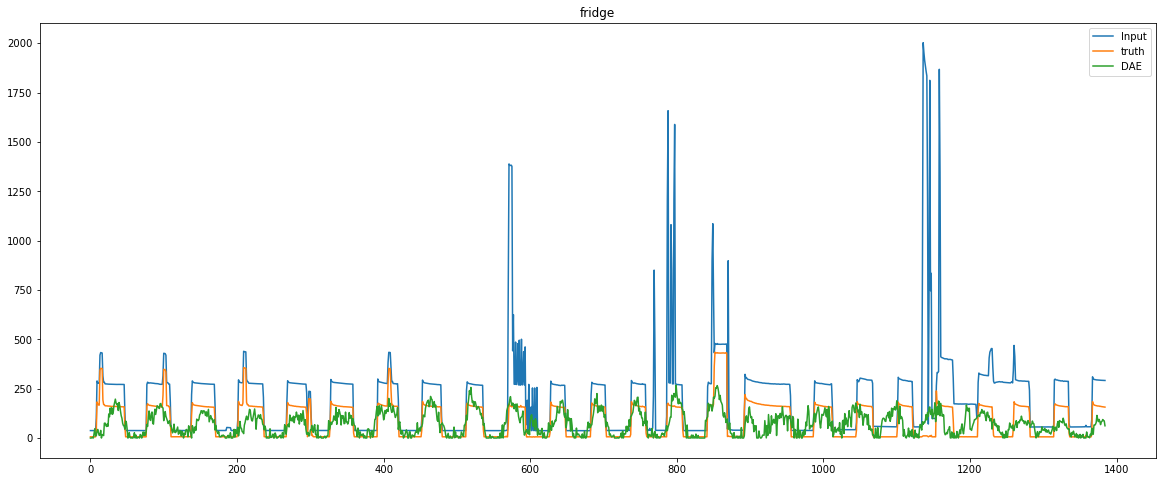

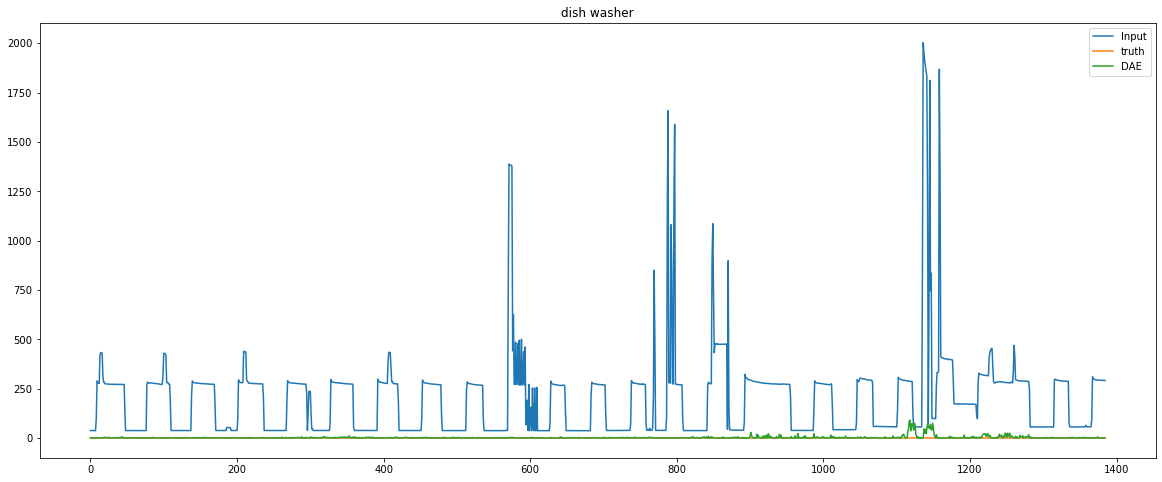

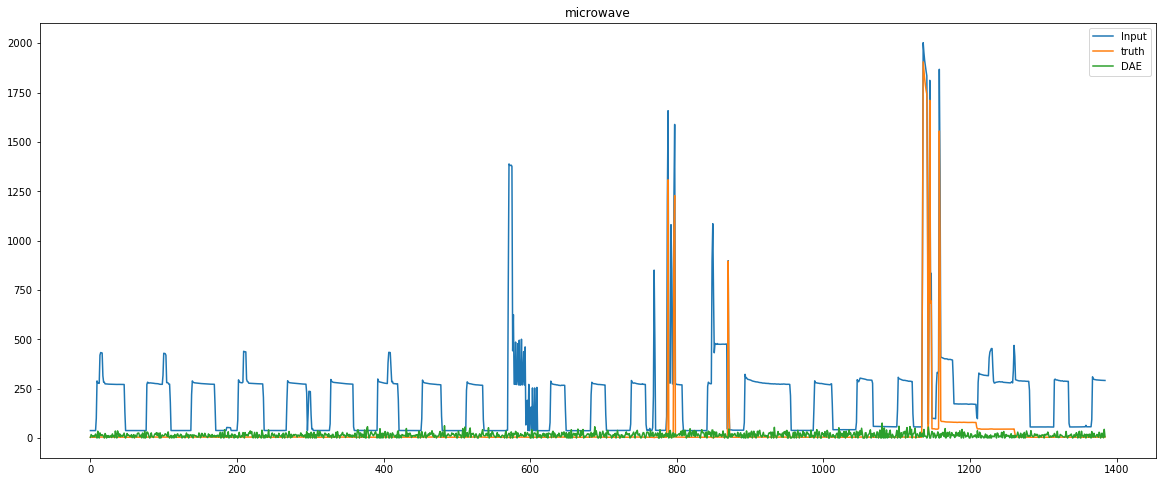

............  mae  ..............
                   DAE
light        13.674789
fridge       52.828430
dish washer   2.591585
microwave    31.885433
............  rmse  ..............
                    DAE
light         31.279789
fridge        75.260216
dish washer    8.574517
microwave    157.519760


In [42]:
API(redd)

oo Chunk Training
............... Loading Data for preprocessing ...................
............... Loading Train_Mains for preprocessing ...................
Loading data for  REDD  dataset
Loading building ...  2
['light']
MeterGroup(meters=
  ElecMeter(instance=1, building=2, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=2, dataset='REDD', site_meter, appliances=[])
)
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
starting enumeration..........
Loading data for meter ElecMeterID(instance=2, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=4, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Droppping NANS
Called Partial fit
WindowGRU <disaggregate.WindowGRU.WindowGRU object at 0x7f1563dbb080>
Training processing
First model training for  light
Train on 14610 samples, validate o

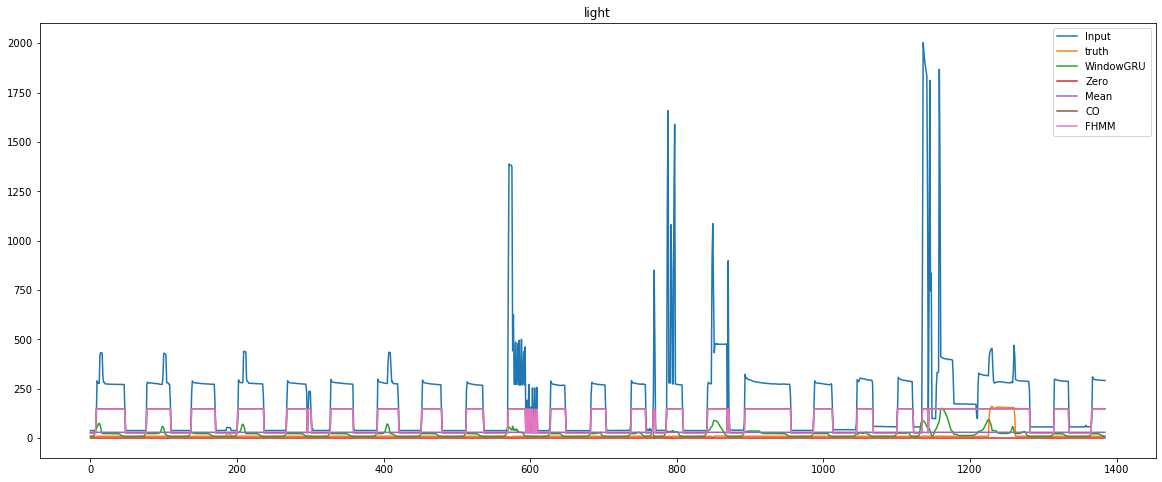

............  mae  ..............
       WindowGRU       Zero       Mean         CO       FHMM
light  13.714099  12.211423  23.163198  80.061142  79.108795
............  rmse  ..............
       WindowGRU       Zero       Mean          CO        FHMM
light  27.929531  25.920622  28.365757  100.879242  100.090561
............  f1-score  ..............
       WindowGRU  Zero     Mean       CO     FHMM
light   0.153293   0.0  0.09622  0.09622  0.09622
............  rel_error  ..............
       WindowGRU       Zero       Mean         CO       FHMM
light  13.714099  12.211423  23.163198  80.061141  79.108794


/data/anaconda/envs/nilmtk_env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
API(redd)

In [40]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
